In [130]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [131]:
df = pd.read_csv("train.csv")

df.head(15)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

EDA

first i will inspect the distribution of Sale Price

Text(0.5, 0, 'Sale Price')

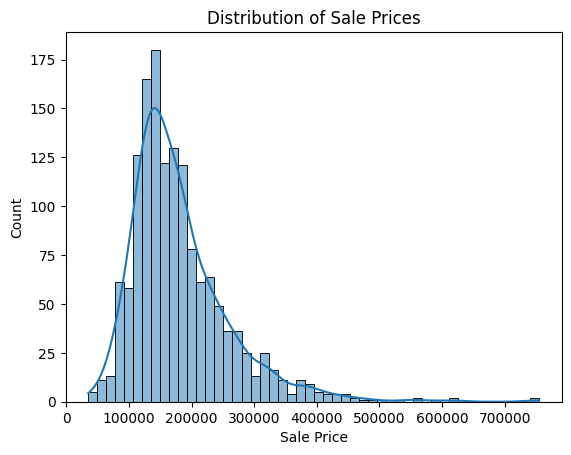

In [132]:
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')    

right skewed

looking at null values

In [133]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])
print("number of features with null values is ",len(nulls[nulls >0]), "!")
#1459 rows total 


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
number of features with null values is  19 !


features with large amounts of missing values: PoolQC, Fence, MiscFeature, Alley

inspect further


Alley: Type of alley access 

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories


guess that the reason the number of null values for these features is so high is due to the fact they are not applicable (house does not have pool)

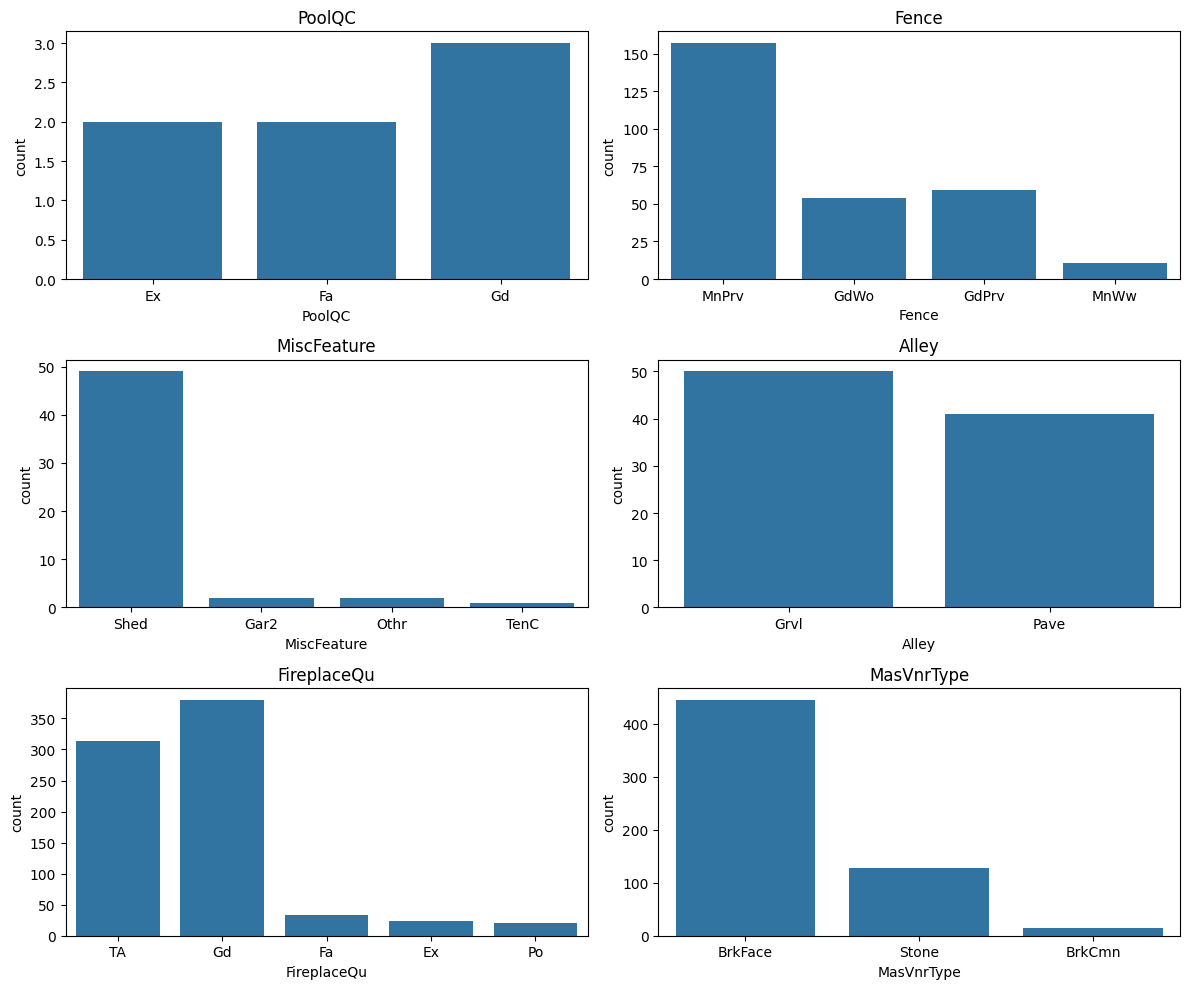

In [134]:
['PoolQC', 'Fence', 'MiscFealotNA = ture', 'Alley', 'FireplaceQu', 'MasVnrType']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, feature in zip(axes.flat, lotNA):
    sns.countplot(x=df[feature], ax=ax)
    ax.set_title(feature)
plt.tight_layout()
plt.show()




In [135]:
print(df['PoolQC'].value_counts())
print(df['Fence'].value_counts())
print(df['MiscFeature'].value_counts())
print(df['FireplaceQu'].value_counts())
print(df['MasVnrType'].value_counts())
print(df['PoolQC'].value_counts())



PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


miscfeature and 'MasVnrType' can be encoded using one hot encoding use ordinal encoding for the rest


In [136]:

#for MasVnrType dont want a column for NaN since if the material is unknwon then it doesn't provide any
#useable/interpretable information, set dummy_na to false
#also set false for MiscFeature since there are only a handful of non Nan values
df = pd.get_dummies(df, columns=['MasVnrType'], dummy_na=False)
df = pd.get_dummies(df, columns=['MiscFeature'], dummy_na=False)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,False,True,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,False,True,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,False,True,False,False,False,False,False


In [137]:
poolqc_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NaN': 0}
fireplacequ_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
alley_map = {'Pave': 2, 'Grvl': 1, 'NaN': 0}

#will encode fence like so since it has unique entries, can come back and edit in future
# if problems arise!

fence_map = {
    'GdPrv': 2, 'MnPrv': 2, 
    'GdWo': 1, 'MnWw': 1,    
    'NaN': 0                 
}
df['PoolQC'] = df['PoolQC'].fillna('NaN').map(poolqc_map)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NaN').map(fireplacequ_map)
df['Alley'] = df['Alley'].fillna('NaN').map(alley_map)
df['Fence'] = df['Fence'].fillna('NaN').map(fence_map)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,WD,Normal,208500,False,True,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,WD,Normal,181500,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,WD,Normal,223500,False,True,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,WD,Abnorml,140000,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,WD,Normal,250000,False,True,False,False,False,False,False


need to encode the rest of the string columns...

In [138]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
#TODO: compare pool stuffs to potentially get info out of the pool quality thing

want to start predicting, start with cleaning the numeric columns and then training a model solely on that data, later will compare the performance with a model that contains the categorical columns too

In [ ]:
#TODO: 